# HOUSE GRADE CLASSIFICATION

## TECHNICAL GOALS
* Understand the data very well. Do all transformations / data engineering/etc. wherever applicable.
* Perform Exploratory Data Analysis(EDA).
* Carry out all the Data mining tasks.
* Identify the salient features that will determine the best results.
* Perform the model evaluation to select the appropriate algorithms.

## Preparing Data for Machine Learning

### Data Preparation

### Import the liabraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

### Read the data file

In [2]:
data=pd.read_csv("Project2_Classification_HouseGrade_Data_Project.csv")
data.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


## Understanding data structure

### All columns

In [3]:
data.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

### structure of dataset

In [4]:
data.shape

(3000, 14)

In [5]:
data.size

42000

### Summary of dataset

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


In [7]:
data.describe(include = 'object').T

,count,unique,top,freq
roof,3000,2,YES,1543
Grade,3000,5,D,1270


### Count of each columns or feature in the data set 

In [8]:
data['Area(total)'].value_counts()

344    55
308    54
349    54
292    53
360    52
       ..
297    33
358    32
294    32
336    32
352    31
Name: Area(total), Length: 71, dtype: int64

In [9]:
data.Trooms.value_counts()

9    641
6    634
7    586
5    574
8    565
Name: Trooms, dtype: int64

#### We have 5 different categories of trooms the number of room  the troom 9 is the highest in numbers .

In [10]:
data.Nbedrooms.value_counts()

4    623
5    600
6    573
3    410
7    393
8    226
2    175
Name: Nbedrooms, dtype: int64

#### We have 7 different categories of bedrooms the 4 room bedrooms is the highest one .


In [11]:
data.Nbwashrooms.value_counts()

4    590
5    584
3    550
6    475
7    310
2    288
8    116
1     87
Name: Nbwashrooms, dtype: int64

#### We have different categories of attached bathrooms 4 attached bathroom with the bedroom is the highest in numbers. 

In [12]:
data.Twashrooms.value_counts()

5     585
6     580
7     532
4     407
8     398
9     208
3     183
10     57
2      50
Name: Twashrooms, dtype: int64

#### We have 9 categories of washrooms and rooms with 5 washroom is the highest in numbers.

In [13]:
data['Roof(Area)'].value_counts()

0      1457
116      42
87       40
96       39
82       39
90       36
104      36
79       36
77       36
93       36
118      35
98       35
70       34
88       34
97       34
106      34
110      34
101      34
74       34
115      34
91       33
117      32
102      32
108      31
75       30
103      30
100      30
84       30
95       29
76       29
99       29
78       29
89       28
119      28
120      27
105      27
109      27
92       27
73       27
113      27
72       27
112      26
111      25
71       25
85       25
114      25
86       24
94       23
83       23
107      22
81       17
80       17
Name: Roof(Area), dtype: int64

#### We have roof in the house but house with no roof is highest in number that is equal to 1457.

In [14]:
data['Lawn(Area)'].value_counts()

101    74
119    71
114    70
111    70
115    68
73     68
104    67
117    66
88     66
102    66
77     64
82     64
96     64
105    63
98     63
112    63
91     63
71     63
108    62
120    62
113    62
118    61
75     61
100    61
109    60
81     60
76     59
93     59
95     59
85     58
72     57
97     55
116    55
106    54
99     54
103    54
80     54
94     53
87     53
92     53
78     53
90     52
86     52
83     51
84     50
79     49
110    49
74     49
70     47
89     45
107    44
Name: Lawn(Area), dtype: int64

#### The houses have different lawn areas the maximum houses have 101 lawn area.

In [15]:
data.Nfloors.value_counts()

3    640
5    592
4    567
6    436
2    395
7    186
1    184
Name: Nfloors, dtype: int64

#### The data have different categories of floors the houses with three floors is the highest in number.

In [16]:
data.API.value_counts()  # API(air pollution index)

77    69
83    66
69    66
63    62
41    59
      ..
49    37
76    37
61    37
88    32
78    30
Name: API, Length: 61, dtype: int64

#### The houses have different air pollution index .

In [17]:
data.head(1)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D


In [18]:
data.ANB.value_counts() # (average number of belongings)

5    538
2    527
4    513
1    498
3    467
6    457
Name: ANB, dtype: int64

#### We have 6 categories of ANB in the houses the ANB with 5 is the highest in numbers.

In [19]:
data['Expected price'].value_counts()

3979    7
4328    7
3335    7
4069    6
3998    6
       ..
4886    1
3167    1
3015    1
2698    1
3470    1
Name: Expected price, Length: 1647, dtype: int64

In [20]:
data['Grade'].value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

#### We have 5 different categories of grade in the houses the D grade of houses is highest and with the grade E is the lowest .

## Checking for null values

In [21]:
data.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

#### We do not have missing values in the dataset so we do not need null value tratement.

In [22]:
data.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

#### We have two object type features and rest are integer or numeric features.

## converting all the non numerical columns into categorical type

In [23]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from tabulate import tabulate

In [24]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(data)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))

Categorical    continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


## 

## Performing EDA(Univariate) on categorical column

In [25]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {data[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {data[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if data[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [26]:
info_of_cat("Nfloors")

Unique values in Nfloors are: [2 3 5 6 1 4 7]
Mode of Nfloors is 3
Number of missing values in Nfloors is 0


In [27]:
info_of_cat("ANB")

Unique values in ANB are: [6 4 3 2 1 5]
Mode of ANB is 5
Number of missing values in ANB is 0


In [28]:
info_of_cat("Twashrooms")

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


In [29]:
info_of_cat("Nbedrooms")

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


In [30]:
info_of_cat("Trooms")

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


## EDA(continuous columns)

In [31]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")

In [32]:
info_of_numerical("Area(total)")

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The mode of the Area(total) is 344
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


In [33]:
info_of_numerical("Roof(Area)")

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The mode of the Roof(Area) is 0
The standard deviation of the Roof(Area) is 48.74664129867301
Number of missing values in the Roof(Area) is 0


In [34]:
info_of_numerical("Lawn(Area)")

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The mode of the Lawn(Area) is 101
The standard deviation of the Lawn(Area) is 14.83738843555081
Number of missing values in the Lawn(Area) is 0


In [35]:
info_of_numerical("API")

The mean of the API is 70.19066666666667
The median of the API is 70.0
The mode of the API is 77
The standard deviation of the API is 17.563460306410814
Number of missing values in the API is 0


In [36]:
info_of_numerical("Expected price")

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The mode of the Expected price is 3335
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


## Histogram of all numerical features


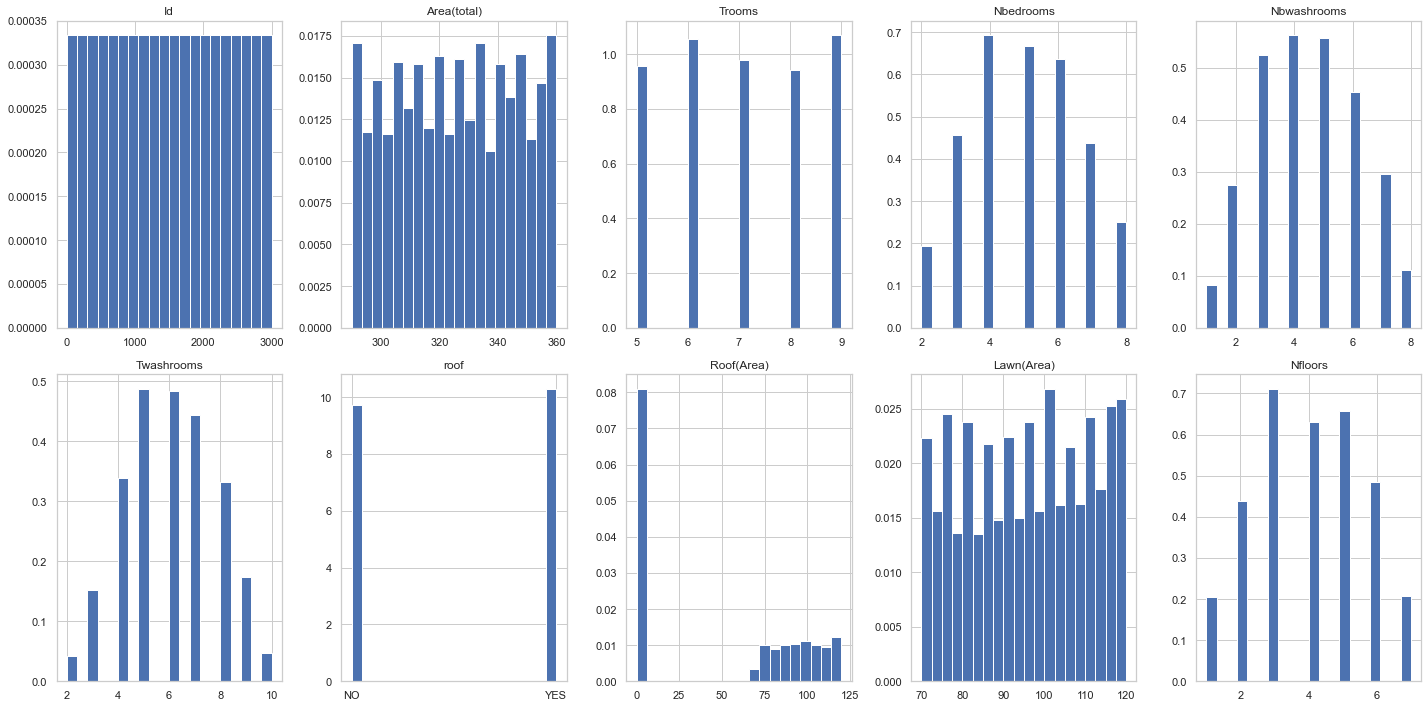

In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = data.select_dtypes(include=numerics)
numeric_cols=data.columns
num_cols=5
n_bins = 20

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(data[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

## Scatter plot for all columns

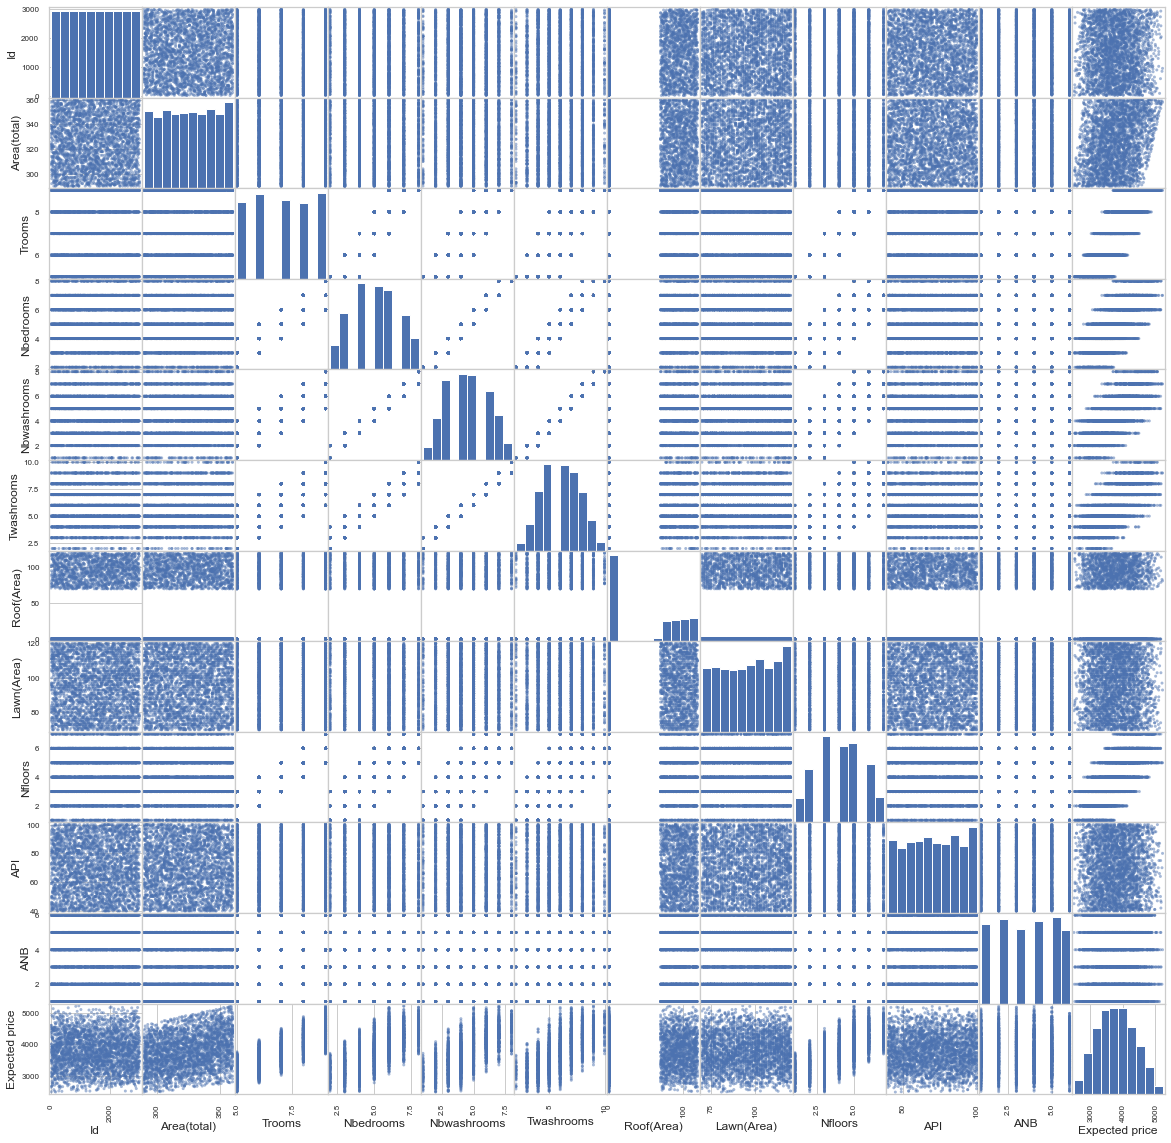

In [38]:
pd.plotting.scatter_matrix(data[numeric_cols].sample(3000),figsize=(20,20))
plt.show()

#### Nothing is very much clear from this scatter plot we cannot take out any meaniful interpretation from it.

##   Using Label Encoder technique to convert categorical column into numerical type

In [39]:
label_encoder=preprocessing.LabelEncoder()


In [40]:
data['roof_encode']= label_encoder.fit_transform(data['roof'])
data['roof_encode'].unique()


array([0, 1])

In [41]:
data['Grade_encode']= label_encoder.fit_transform(data['Grade'])
data['Grade_encode'].unique()


array([3, 2, 1, 0, 4])

##  converting the categorical columns into numerical type using label encoding

In [42]:
def feature_scale(scale):
    numeric=['int32','float32','int64','float64']
    new_data=data.select_dtypes(include=numeric)
    if scale=="minmax":
        scaler=MinMaxScaler()
    else:
        scale=StandardScaler()
    data_scale=pd.DataFrame(scale.fit_transform(new_data.to_numpy()),columns=new_data.columns)    
    return data_scale

In [43]:
scale ='123'
data_scaled=feature_scale(scale)
data_scaled.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,Grade_encode
0,-1.731474,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,-1.029090,0.874159
1,-1.730319,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.971733,0.874159
2,-1.729164,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,0.971733,-0.025490
3,-1.728009,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.971733,0.874159
4,-1.726855,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,-1.029090,0.874159


##  scaling of the data for better comparision

### Correlation

In [44]:
data_scaled.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,Grade_encode
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,0.011059,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000


In [45]:
corr=data_scaled.corr()
corr.style.background_gradient(cmap='Accent')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,Grade_encode
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,0.011059,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000


In [46]:
x=data_scaled.corr()

<AxesSubplot:>

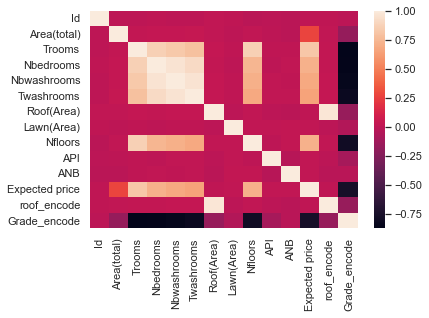

In [47]:
sns.heatmap(x)

#### As we can see that trooms , nbedrooms, nwashrooms, twashrooms, nfloors,expected price are highly correlated to the grade.

In [48]:
new_data=data[['API','Lawn(Area)','Trooms' , 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'Nfloors','Expected price', 'Area(total)', 'roof_encode', 'Grade_encode' ]]

In [49]:
new_data

,API,Lawn(Area),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Area(total),roof_encode,Grade_encode
0,79,76,6,5,4,6,2,3481,339,0,3
1,72,96,5,4,3,4,3,3510,358,1,3
2,64,117,7,5,4,5,5,3748,324,1,2
3,59,82,6,4,3,5,2,3134,330,1,3
4,40,75,7,4,4,5,3,3843,320,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2995,90,115,9,6,5,7,5,4246,341,1,1
2996,97,87,9,8,7,8,7,3753,292,1,0
2997,95,78,7,4,3,5,5,3607,328,0,3
2998,51,78,9,7,7,8,7,4198,293,0,1


## Pie chart for Grade encode

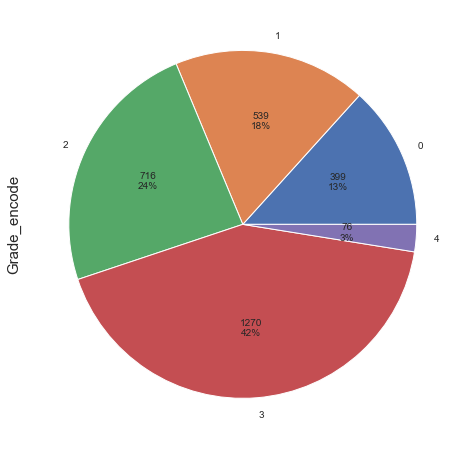

In [50]:
labels=data['Grade_encode'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['Grade_encode']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Grade_encode', size=15)
# show plot
plt.show()

#### The maximum number of houses is in grade 3

## Pie chart for roof encode

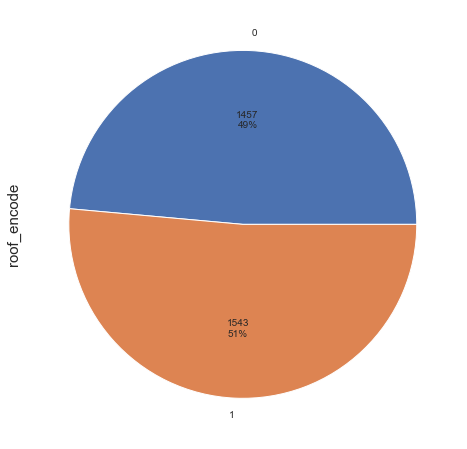

In [51]:
labels=data['roof_encode'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['roof_encode']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('roof_encode', size=15)
# show plot
plt.show()

#### Almost equal number of roof 1 and 0 but roof is more by just 2%

## Pie chart for Nfloors 

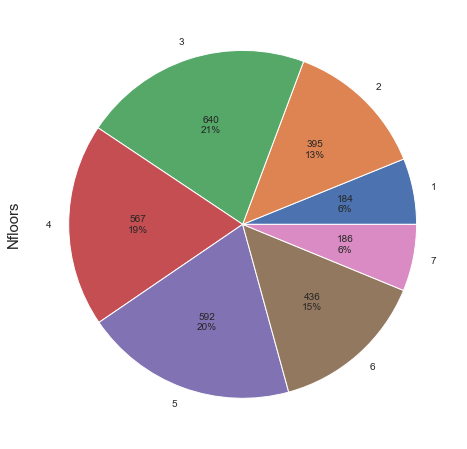

In [52]:
labels=data['Nfloors'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['Nfloors']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Nfloors', size=15)
# show plot
plt.show()

#### The highest number of  houses with 3 floor is maximum followed by 5 and the  4.

## Pie chart for Twashrooms

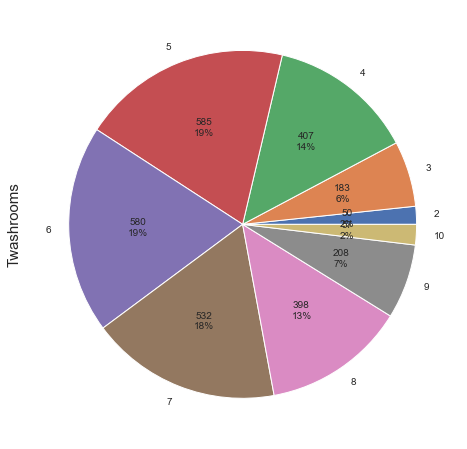

In [53]:
labels=data['Twashrooms'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['Twashrooms']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Twashrooms', size=15)
# show plot
plt.show()

#### Total number of washrooms in the houses with maximum 10 and the majority with the 5 and 6 .

## Pie chart for Nbwashrooms

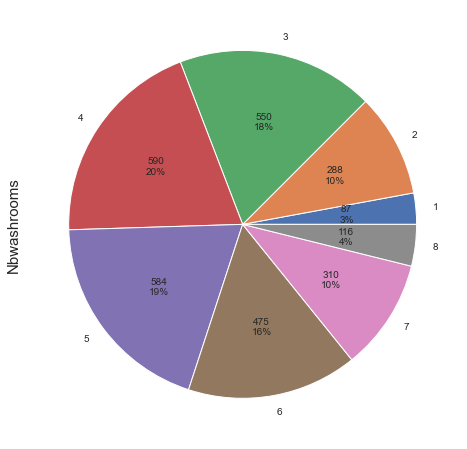

In [54]:
labels=data['Nbwashrooms'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['Nbwashrooms']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Nbwashrooms', size=15)
# show plot
plt.show()

#### The highest in number of nbwashrooms is 4 and followed by 5

## Pie chart for Nbedrooms

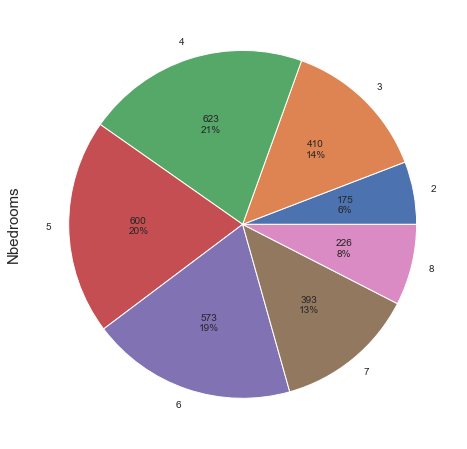

In [55]:
labels=data['Nbedrooms'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['Nbedrooms']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Nbedrooms', size=15)
# show plot
plt.show()

#### The houses with the 4 bedrooms are high in numbers followed by 3, 5,6.

## Pie chart for Trooms

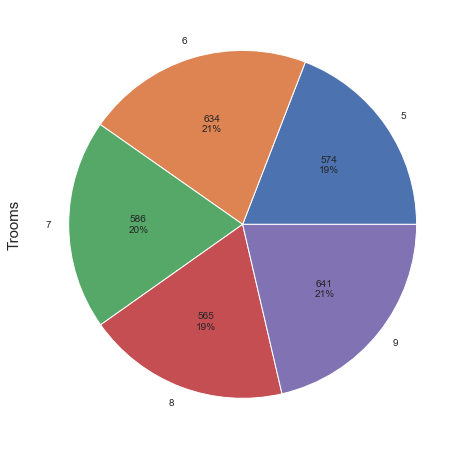

In [56]:
labels=data['Trooms'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
data.groupby(data['Trooms']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Trooms', size=15)
# show plot
plt.show()

#### The total with 6 rooms is highest followed by 7 

## Splitting the data into 80 : 20 ratio


In [57]:
x=new_data
y=new_data["Grade_encode"]

In [58]:
x=x.drop(columns='Grade_encode',axis=1)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [60]:
x_train

,API,Lawn(Area),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Area(total),roof_encode
826,57,99,5,2,1,2,2,3194,335,1
66,41,104,5,4,3,4,3,3209,323,1
368,89,96,6,4,4,6,4,4001,337,0
1659,69,85,8,6,6,8,6,4488,321,0
109,94,108,9,6,6,8,7,3996,317,0
...,...,...,...,...,...,...,...,...,...,...
1428,87,87,9,6,5,7,5,5097,358,1
2441,98,107,8,6,6,8,4,4749,349,1
2972,56,105,7,4,4,5,4,4318,352,1
271,90,75,7,4,3,5,3,3622,317,0


In [61]:
y_train

826     3
66      3
368     3
1659    2
109     1
       ..
1428    1
2441    1
2972    2
271     3
2522    2
Name: Grade_encode, Length: 2400, dtype: int32

## Building Logistic Regression

In [62]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred_test=model.predict(x_test)


In [64]:
model.score(x_train,y_train)

0.5320833333333334

#### The model has 53%accuracy for train data

In [65]:
model.score(x_test,y_test)

0.56

#### The model has 56%accuracy for test data

In [66]:
model.intercept_

array([-0.00029107, -0.0001827 , -0.00014435,  0.00040869,  0.00020944])

In [67]:

np.unique(y_pred_test)

array([0, 1, 2, 3])

In [68]:
from collections import Counter
x = 0
d = Counter(y_pred_test)
print('{} has occurred {} times'.format(x, d[x]))

0 has occurred 53 times


In [69]:
x = 1
d = Counter(y_pred_test)
print('{} has occurred {} times'.format(x, d[x]))

1 has occurred 133 times


In [70]:
x = 2
d = Counter(y_pred_test)
print('{} has occurred {} times'.format(x, d[x]))

2 has occurred 122 times


In [71]:
x = 3
d = Counter(y_pred_test)
print('{} has occurred {} times'.format(x, d[x]))

3 has occurred 292 times


### CONFUSION MATRIX

#### A confusion matrix is a technique for summarizing the performance of a classification algorithm.Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.


#### A confusion matrix is a summary of prediction results on a classification problem.

* The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

In [72]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)
cm = confusion_matrix(y_test,y_pred_test).ravel()
print(cm)

[ 24  47  19   1   0  18  48  30  12   0   9  32  47  49   0   2   6  26
 217   0   0   0   0  13   0]


In [73]:
coee=pd.DataFrame(new_data.columns)
coee.columns=['Features']
coee['Correlation']=pd.Series(model.coef_[0])
coee.sort_values(by='Correlation',ascending=False)

,Features,Correlation
4,Nbwashrooms,0.007709
5,Twashrooms,0.007403
3,Nbedrooms,0.006799
6,Nfloors,0.004858
7,Expected price,0.004024
2,Trooms,0.002987
9,roof_encode,0.000743
0,API,-0.001546
1,Lawn(Area),-0.012185
8,Area(total),-0.045458


#### Nbwashrooms , Twashrooms, Nbedrooms, Nfloors, Expected price and Trooms plays major role in grading the house.

In [97]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test,y_pred,average='weighted'))
print('f1-score:', f1_score(y_test,y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred,average='weighted'))

accuracy: 0.8233333333333334
recall: 0.8233333333333334
f1-score: 0.8274869252112541
precision: 0.833401049287094


#### F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two

#### Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

#### Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class 

#### I am not finding the auc and roc curve because the target variable have more than two categories and auc and roc curve only works with 2 categories.

## Guassian Naive Bayes modelling

In [75]:
from sklearn.naive_bayes import GaussianNB

### Build the model

In [76]:
# Fitting Naive Bayes to the Training set  
 
classifier = GaussianNB()
classifier.fit(x_train, y_train) 

GaussianNB()

### Evaluate the Model

In [77]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test) 

### Confusion matrix

In [78]:
# Making the Confusion Matrix  
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 80,  11,   0,   0,   0],
       [  8,  87,  13,   0,   0],
       [  0,  34,  89,  14,   0],
       [  0,   0,  31, 200,  20],
       [  0,   0,   0,   2,  11]], dtype=int64)

In [79]:
# Evaluate Accuracy Score
accuracy_score(y_test, y_pred)

0.7783333333333333

#### The accuracy score is almost equals to 78 %

In [80]:

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test,y_pred,average='weighted'))
print('f1-score:', f1_score(y_test,y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred,average='weighted'))

accuracy: 0.7783333333333333
recall: 0.7783333333333333
f1-score: 0.7857476566721798
precision: 0.8043434887860468


## Modeling - Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [82]:
model=DecisionTreeClassifier()

In [83]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred = model.predict(x_test)

In [85]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8233333333333334


### Confusion matrix

In [86]:
confusion_matrix(y_test,y_pred)

array([[ 79,  12,   0,   0,   0],
       [ 12,  80,  16,   0,   0],
       [  0,  14, 108,  15,   0],
       [  0,   0,  15, 220,  16],
       [  0,   0,   0,   6,   7]], dtype=int64)

In [87]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred,average='weighted'))

accuracy: 0.8233333333333334
recall: 0.8233333333333334
f1-score: 0.8274869252112541
precision: 0.833401049287094


## Random Forest Model

In [88]:
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

In [89]:
x=new_data
x.head()

,API,Lawn(Area),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Area(total),roof_encode,Grade_encode
0,79,76,6,5,4,6,2,3481,339,0,3
1,72,96,5,4,3,4,3,3510,358,1,3
2,64,117,7,5,4,5,5,3748,324,1,2
3,59,82,6,4,3,5,2,3134,330,1,3
4,40,75,7,4,4,5,3,3843,320,0,3


In [90]:
model=RandomForestClassifier()

In [91]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
model.score(x_test,y_test)

0.9

In [93]:
results1,names1=list(),list()

In [100]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [101]:
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x,y, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
results1.append(n_scores)
names1.append('rf')
# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 1.000 (0.000)


### Conclusion- 
 * I have build four models for my data that is Logestic Regression,Naives bayes ,Decision Tree Classifier and Random forest        classifier

#### 
* My accuracy for Logistic regression Model is 56%
* My accuracy for Naives Bayes Model is 78%
* My accuracy for Decision Tree Model is 82%
* my accuracy for Random Forest Model is 100%

#### 
* So in real time business i will consider my Random Forest Model because it is giving me the highest accuracy so i will go with this model.